In [1]:
pip install google-colab

^C
Note: you may need to restart the kernel to use updated packages.


# **Import from libraries**

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow

# **Uploading the images**

In [28]:
path = 'D:\Anaconda\Projects\SOCOFing\Altered'

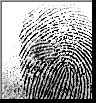

In [29]:
tf.keras.preprocessing.image.load_img('D:\Anaconda\Projects/SOCOFing/Altered/Altered-Easy/10__M_Left_index_finger_CR.BMP')

# **Training and Testing Basis**

In [33]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
training_dataset = training_generator.flow_from_directory('D:\Anaconda\Projects\SOCOFing\Altered',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 49270 images belonging to 3 classes.


In [34]:
training_dataset.classes

array([0, 0, 0, ..., 2, 2, 2])

In [35]:
training_dataset.class_indices

{'Altered-Easy': 0, 'Altered-Hard': 1, 'Altered-Medium': 2}

In [36]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('D:\Anaconda\Projects\SOCOFing\SOCOFing\Altered',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 49270 images belonging to 3 classes.


# **Construction and training of the neural network**

In [37]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 3, activation='softmax'))

In [38]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 7317)             

In [39]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [40]:
historic = network.fit(training_dataset, epochs=2)

Epoch 1/2
1540/1540 [==============================] - 1872s 1s/step - loss: 0.9724 - accuracy: 0.5225
Epoch 2/2
1540/1540 [==============================] - 1251s 812ms/step - loss: 0.8156 - accuracy: 0.6049


# **Neural network evaluation**

In [41]:
test_dataset.class_indices

{'Altered-Easy': 0, 'Altered-Hard': 1, 'Altered-Medium': 2}

In [42]:
forecasts = network.predict(test_dataset)
forecasts      

array([[9.9699318e-01, 1.5951120e-04, 2.8473381e-03],
       [9.0634370e-01, 1.2081660e-02, 8.1574611e-02],
       [9.9607337e-01, 2.0068799e-04, 3.7260139e-03],
       ...,
       [8.7040561e-01, 1.6236268e-02, 1.1335815e-01],
       [1.4520212e-01, 1.3347323e-01, 7.2132462e-01],
       [9.4065857e-01, 5.0035357e-03, 5.4337841e-02]], dtype=float32)

In [43]:
forecasts = np.argmax(forecasts, axis = 1)
forecasts  

array([0, 0, 0, ..., 0, 2, 0], dtype=int64)

In [44]:
test_dataset.classes

array([0, 0, 0, ..., 2, 2, 2])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, forecasts)

0.519707732900345

In [46]:
test_dataset.class_indices

{'Altered-Easy': 0, 'Altered-Hard': 1, 'Altered-Medium': 2}

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, forecasts)
cm

array([[16363,    60,  1508],
       [ 4362,  1252,  8658],
       [ 8747,   329,  7991]], dtype=int64)

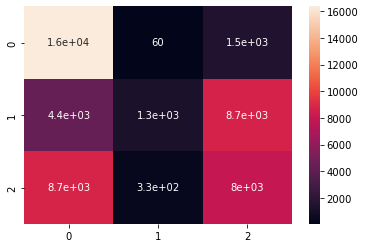

In [48]:
sns.heatmap(cm, annot=True);

In [49]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, forecasts))

              precision    recall  f1-score   support

           0       0.56      0.91      0.69     17931
           1       0.76      0.09      0.16     14272
           2       0.44      0.47      0.45     17067

    accuracy                           0.52     49270
   macro avg       0.59      0.49      0.43     49270
weighted avg       0.58      0.52      0.45     49270



# **Single image classification**

In [104]:
image = cv2.imread('D:/Anaconda/Projects/SOCOFing/Altered/Altered-Hard/10__M_Left_middle_finger_Zcut.BMP')

In [107]:
image = X_batch[0]
        plt.imshow(image)
    plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [105]:
cv2.imshow(image)

error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [96]:
image = cv2.resize(image, (64, 64))
cv2.imshow('Show',image)

In [97]:
image = image / 255
image

array([[0.61176471, 0.56078431, 0.56078431, ..., 0.14117647, 0.        ,
        0.        ],
       [0.57254902, 0.81568627, 0.94901961, ..., 0.23921569, 0.        ,
        0.        ],
       [0.57254902, 0.85098039, 1.        , ..., 0.25098039, 0.        ,
        0.        ],
       ...,
       [0.30196078, 0.32156863, 0.41176471, ..., 0.11764706, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
image.shape

(64, 64)

In [99]:
image = image.reshape(-1, 64, 64, 3)
image.shape

ValueError: cannot reshape array of size 4096 into shape (64,64,3)

In [100]:
result = network(image)
result

ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).

Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (64, 64)

Call arguments received:
  • inputs=tf.Tensor(shape=(64, 64), dtype=float64)
  • training=None
  • mask=None

In [101]:
result = np.argmax(result)
result

0

In [102]:
test_dataset.class_indices

{'Altered-Easy': 0, 'Altered-Hard': 1, 'Altered-Medium': 2}

In [103]:
if result == 0:
  print('Altered-Easy')
else:
 if result == 1:
    print('Altered-Hard')
 else:
    print('Altered-Medium')

Altered-Easy


# **If you find this notebook useful, support with an upvote** 👍¶¶